## Lab 8: Initial-Value Problems for Ordinary Differential Equations: Euler’s Method and Runge Kutta Method

### Euler's Method

Euler's method is a numerical technique for solving ordinary differential equations (ODEs). The method approximates the solution of the equation $ \frac{dy}{dx} = f(x, y) $ using the following iterative formula:

$$
y_{n+1} = y_n + h * f(x_n, y_n)
$$

Where:
- $ y_n $ is the current value of $ y $,
- $ x_n $ is the current value of $ x $,
- $ h $ is the step size,
- $ f(x_n, y_n) $ is the derivative at the current point.


In [1]:
def euler_method(f, x0, y0, h, n):
    results = [(x0, y0)]
    for i in range(n):
        y0 = y0 + h * f(x0, y0)
        x0 = x0 + h
        results.append((x0, y0))
    return results

### Euler's Method

Euler's Method is a simple numerical technique for solving ordinary differential equations of the form:

$$
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0
$$

#### Algorithm

1. **Initialization**:
   - Define the initial conditions: $x_0, y_0$.
   - Choose the step size $h$.

2. **Iterative Steps**:
   For each iteration:
   - Compute the slope at the current point:
     $$
     f(x_n, y_n)
     $$
   - Update the solution:
     $$
     y_{n+1} = y_n + h \cdot f(x_n, y_n)
     $$
   - Advance to the next step:
     $$
     x_{n+1} = x_n + h
     $$

3. **Stopping Condition**:
   - Repeat the above steps until $x_n \geq x_{\text{end}}$.

#### Notes
- $h$ is the step size. Smaller $h$ improves accuracy but increases computational cost.
- The method assumes that $f(x, y)$ is continuous and differentiable.
- Euler's method is less accurate than higher-order methods like Runge-Kutta but easier to implement.

In [2]:
import numpy as np

def euler_method(f, x0, y0, x_end, h):
    x_values = [x0]
    y_values = [y0]
    
    x = x0
    y = y0
    
    while x < x_end:
        y = y + h * f(x, y)
        x = x + h
        
        x_values.append(x)
        y_values.append(y)
    
    return np.array(x_values), np.array(y_values)

### Example

Given $ \frac{dy}{dx} = x - y $, $ y(0) = 1 $, find $ y(x) $ in the interval $ [0, 2] $ with step size $ h = 0.1 $.

The exact solution to this equation is:

$$
y(x) = x - 1 + 2e^{-x}
$$

x         Euler y        Exact y        Error
---------------------------------------------
0.00      1.0000000      1.0000000      0.0000000
0.10      0.9000000      0.9096748      0.0096748
0.20      0.8200000      0.8374615      0.0174615
0.30      0.7580000      0.7816364      0.0236364
0.40      0.7122000      0.7406401      0.0284401
0.50      0.6809800      0.7130613      0.0320813
0.60      0.6628820      0.6976233      0.0347413
0.70      0.6565938      0.6931706      0.0365768
0.80      0.6609344      0.6986579      0.0377235
0.90      0.6748410      0.7131393      0.0382983
1.00      0.6973569      0.7357589      0.0384020
1.10      0.7276212      0.7657422      0.0381210
1.20      0.7648591      0.8023884      0.0375294
1.30      0.8083732      0.8450636      0.0366904
1.40      0.8575358      0.8931939      0.0356581
1.50      0.9117823      0.9462603      0.0344781
1.60      0.9706040      1.0037930      0.0331890
1.70      1.0335436      1.0653670      0.0318234
1.80    

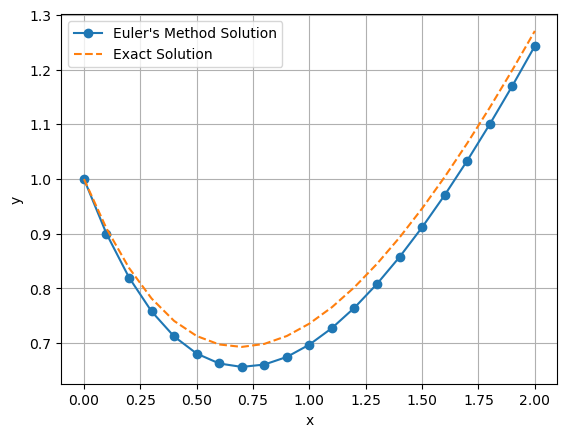

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def example_function(x, y):
    return x - y  # Example ODE: dy/dx = x - y

def exact_solution(x):
    return x - 1 + 2 * np.exp(-x)

x0 = 0
y0 = 1
x_end = 2
h = 0.1

x_vals, y_vals = euler_method(example_function, x0, y0, x_end, h)

exact_y_vals = exact_solution(x_vals)

# Print table header
print("x         Euler y        Exact y        Error")
print("-" * 45)

# Print values in tabular format
for x, y_euler, y_exact in zip(x_vals, y_vals, exact_y_vals):
    error = abs(y_exact - y_euler)
    print(f"{x:.2f}      {y_euler:.7f}      {y_exact:.7f}      {error:.7f}")

# Plot the solution
plt.plot(x_vals, y_vals, label="Euler's Method Solution",marker='o')
plt.plot(x_vals, exact_y_vals, label="Exact Solution", linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

### Runge-Kutta 4th Order Method (RK4)

The Runge-Kutta 4th Order Method is a numerical technique for solving ordinary differential equations of the form:

$$
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0
$$

#### Algorithm

1. **Initialization**:
   - Define the initial conditions: $x_0, y_0$.
   - Choose the step size $h$.

2. **Iterative Steps**:
   For each iteration:
   - Compute the intermediate slopes:
     - $k_1 = f(x_n, y_n)$
     - $k_2 = f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_1\right)$
     - $k_3 = f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2}k_2\right)$
     - $k_4 = f(x_n + h, y_n + hk_3)$
   - Update the solution:
     $$
     y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
     $$
   - Advance to the next step:
     $$
     x_{n+1} = x_n + h
     $$

3. **Stopping Condition**:
   - Repeat the above steps until $x_n \geq x_{\text{end}}$.

#### Notes
- $h$ is the step size, which controls the accuracy of the solution. Smaller $h$ leads to higher accuracy but increases computational cost.
- The method assumes that $f(x, y)$ is continuous and differentiable.

In [4]:
import numpy as np

def runge_kutta_4th_order(f, x0, y0, x_end, h):
    x_values = [x0]
    y_values = [y0]
    
    x = x0
    y = y0
    
    while x < x_end:
        k1 = f(x, y)
        k2 = f(x + h / 2, y + h * k1 / 2)
        k3 = f(x + h / 2, y + h * k2 / 2)
        k4 = f(x + h, y + h * k3)
        
        y = y + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        x = x + h
        
        x_values.append(x)
        y_values.append(y)
    
    return np.array(x_values), np.array(y_values)

### Example
Given $ \frac{dy}{dx} = x - y $, $ y(0) = 1 $, find $ y(x) $ in the interval $ [0, 2] $ with step size $ h = 0.1 $.

The exact solution to this equation is:

$$
y(x) = x - 1 + 2e^{-x}
$$

x         RK4 y          Exact y        Error
---------------------------------------------
0.00      1.0000000      1.0000000      0.0000000
0.10      0.9096750      0.9096748      0.0000002
0.20      0.8374618      0.8374615      0.0000003
0.30      0.7816368      0.7816364      0.0000004
0.40      0.7406406      0.7406401      0.0000005
0.50      0.7130619      0.7130613      0.0000005
0.60      0.6976239      0.6976233      0.0000006
0.70      0.6931712      0.6931706      0.0000006
0.80      0.6986586      0.6986579      0.0000007
0.90      0.7131400      0.7131393      0.0000007
1.00      0.7357595      0.7357589      0.0000007
1.10      0.7657428      0.7657422      0.0000007
1.20      0.8023891      0.8023884      0.0000007
1.30      0.8450642      0.8450636      0.0000006
1.40      0.8931946      0.8931939      0.0000006
1.50      0.9462609      0.9462603      0.0000006
1.60      1.0037936      1.0037930      0.0000006
1.70      1.0653676      1.0653670      0.0000006
1.80    

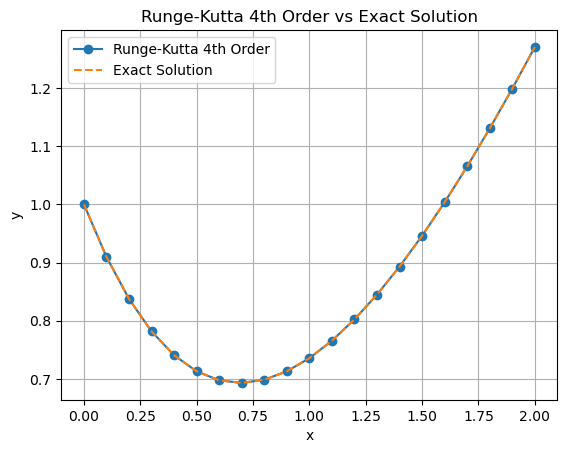

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Differential equation: dy/dx = x - y
def example_function(x, y):
    return x - y

# Exact solution of the differential equation
def exact_solution(x):
    return x - 1 + 2 * np.exp(-x)

# Parameters
x0 = 0
y0 = 1
x_end = 2
h = 0.1

# Solve using Runge-Kutta
x_vals, y_vals = runge_kutta_4th_order(example_function, x0, y0, x_end, h)

# Compute exact values
exact_y_vals = exact_solution(x_vals)

# Print table header
print("x         RK4 y          Exact y        Error")
print("-" * 45)

# Print values in tabular format
for x, y_rk4, y_exact in zip(x_vals, y_vals, exact_y_vals):
    error = abs(y_exact - y_rk4)
    print(f"{x:.2f}      {y_rk4:.7f}      {y_exact:.7f}      {error:.7f}")

# Plot the solution
plt.plot(x_vals, y_vals, label="Runge-Kutta 4th Order", marker='o')
plt.plot(x_vals, exact_y_vals, label="Exact Solution", linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Runge-Kutta 4th Order vs Exact Solution")
plt.show()